# **1. Perkenalan Dataset**


### 🧾 Dataset Description — Taiwanese Bankruptcy Prediction

**Sumber Dataset:**
Dataset ini berasal dari **Taiwan Economic Journal** untuk periode tahun **1999 hingga 2009**, dan diperoleh dari **UCI Machine Learning Repository**:
🔗 [Taiwanese Bankruptcy Prediction Dataset](https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction)

**Deskripsi Umum:**
Dataset ini berisi **rasio keuangan perusahaan publik di Taiwan** yang digunakan untuk **memprediksi kemungkinan kebangkrutan (bankruptcy)** suatu perusahaan. Status kebangkrutan ditentukan berdasarkan regulasi bisnis dari **Taiwan Stock Exchange**. Dataset ini sering digunakan dalam penelitian analisis keuangan dan deteksi risiko korporat.

**Tujuan Penggunaan Dataset:**
Membangun model **klasifikasi biner** untuk memprediksi apakah suatu perusahaan berpotensi **bangkrut (1)** atau **tidak bangkrut (0)** berdasarkan indikator keuangan historisnya.

---

### 📊 Informasi Atribut

* **Target (Y)**
  `Bankrupt?` → Kelas target biner (1 = Bangkrut, 0 = Tidak bangkrut)

* **Fitur (X1 – X95)**
  Dataset memiliki **95 fitur input (rasio keuangan)** yang mencakup berbagai aspek:

  * **Profitabilitas** → Return on Assets, Gross Margin, Profit Growth Rate
  * **Likuiditas** → Current Ratio, Quick Ratio, Cash Flow Ratio
  * **Leverage & Solvabilitas** → Debt Ratio, Liability to Equity, Interest Coverage
  * **Aktivitas & Efisiensi** → Asset Turnover, Inventory Turnover, Collection Days
  * **Pertumbuhan & Nilai Saham** → EPS Growth, Book Value per Share
  * **Cash Flow & Modal Kerja** → Cash Flow to Assets, Working Capital Ratio

Setiap fitur direpresentasikan sebagai rasio atau indikator numerik yang mencerminkan kondisi finansial perusahaan.

---

### 📈 Karakteristik Dataset

| Atribut          | Nilai                                                           |
| ---------------- | --------------------------------------------------------------- |
| Jumlah sampel    | ±6.819 perusahaan                                               |
| Jumlah fitur     | 95                                                              |
| Jenis fitur      | Numerik (rasio keuangan)                                        |
| Target           | `Bankrupt?` (0 atau 1)                                          |
| Jenis tugas      | Klasifikasi biner                                               |
| Periode data     | 1999 – 2009                                                     |
| Sumber data      | Taiwan Economic Journal                                         |
| Referensi ilmiah | Liang et al. (2016), *European Journal of Operational Research* |

---

### 📚 Referensi Penelitian

Liang, D., Lu, C.-C., Tsai, C.-F., & Shih, G.-A. (2016).
*Financial Ratios and Corporate Governance Indicators in Bankruptcy Prediction: A Comprehensive Study.*
**European Journal of Operational Research, 252(2), 561–572.**
🔗 [Link Paper](https://www.sciencedirect.com/science/article/pii/S0377221716000412)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [5]:
# Data & Visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pra-pemrosesan & Model ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Utility
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [9]:
df = pd.read_csv("Company_Bankruptcy_Prediction_data.csv")
print(df.info(100))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [10]:
df.info()
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [11]:
df.dtypes.value_counts()

float64    93
int64       3
Name: count, dtype: int64

In [13]:
# Ringkasan statistik numerik
df.describe().T.style.background_gradient(cmap='Blues').format(precision=3)

In [14]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if missing.empty:
    print("✅ Tidak ada missing values dalam dataset.")
else:
    plt.figure(figsize=(8,6))
    sns.barplot(x=missing.values, y=missing.index, palette='Reds_r')
    plt.title("Jumlah Missing Value per Kolom")
    plt.xlabel("Jumlah Missing")
    plt.ylabel("Fitur")
    plt.show()

✅ Tidak ada missing values dalam dataset.


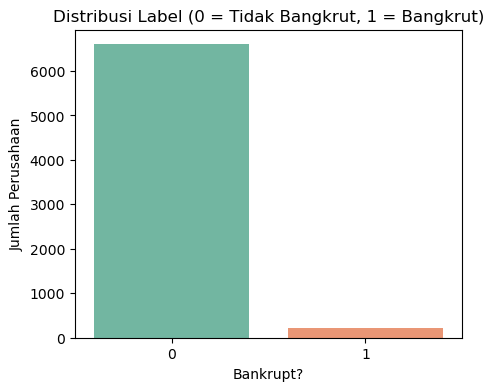

Bankrupt?
0    96.77%
1     3.23%
Name: proportion, dtype: object

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x='Bankrupt?', data=df, palette='Set2')
plt.title("Distribusi Label (0 = Tidak Bangkrut, 1 = Bangkrut)")
plt.xlabel("Bankrupt?")
plt.ylabel("Jumlah Perusahaan")
plt.show()

# Rasio kelas
df['Bankrupt?'].value_counts(normalize=True).map("{:.2%}".format)

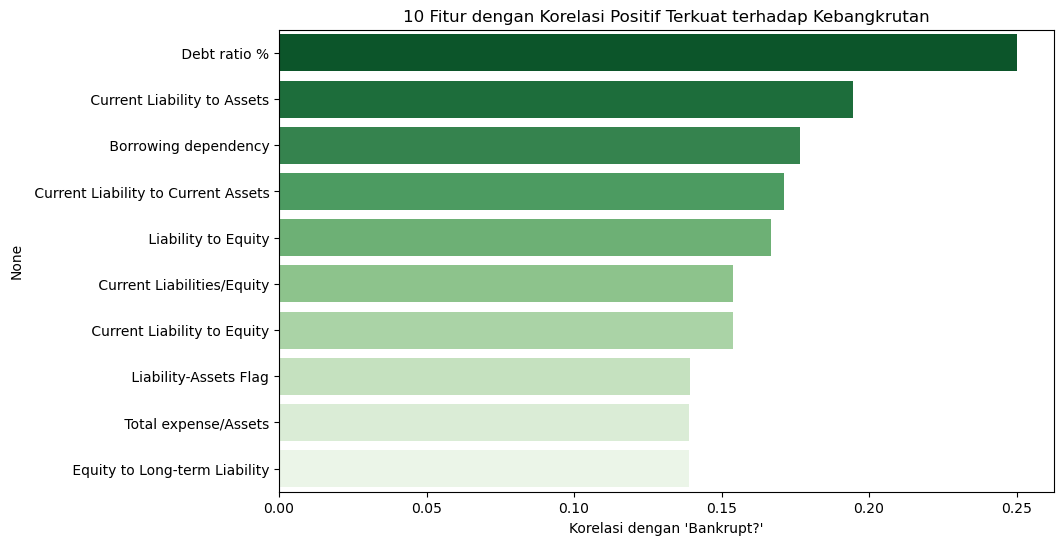

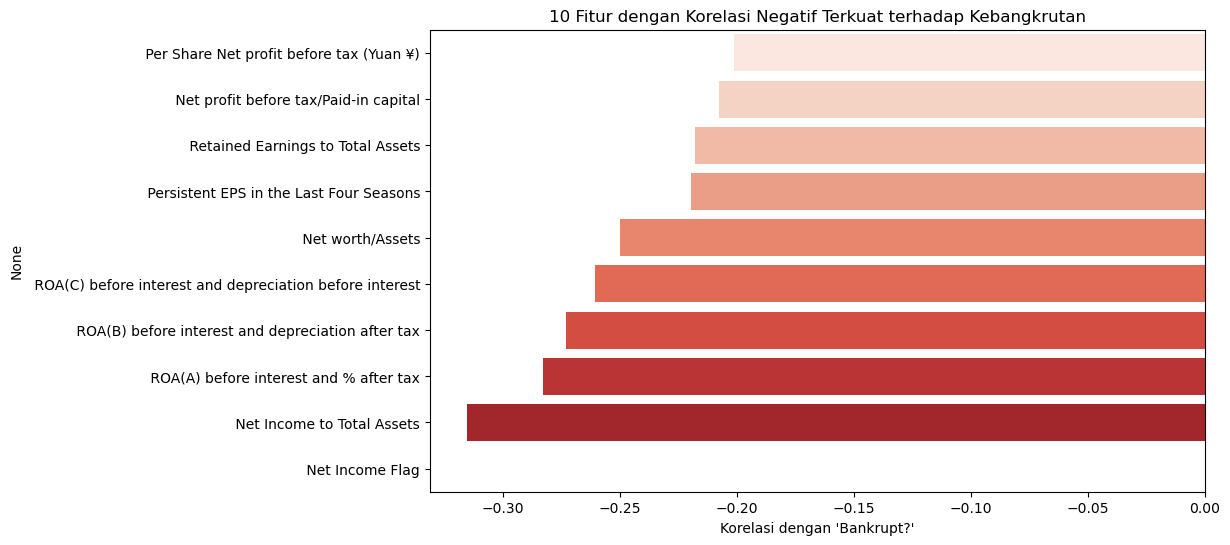

In [16]:
# Hitung korelasi
corr = df.corr(numeric_only=True)['Bankrupt?'].sort_values(ascending=False)

# Tampilkan 10 fitur dengan korelasi tertinggi
top_corr = corr[1:11]  # abaikan target itu sendiri
bottom_corr = corr[-10:]

plt.figure(figsize=(10,6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='Greens_r')
plt.title("10 Fitur dengan Korelasi Positif Terkuat terhadap Kebangkrutan")
plt.xlabel("Korelasi dengan 'Bankrupt?'")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=bottom_corr.values, y=bottom_corr.index, palette='Reds')
plt.title("10 Fitur dengan Korelasi Negatif Terkuat terhadap Kebangkrutan")
plt.xlabel("Korelasi dengan 'Bankrupt?'")
plt.show()

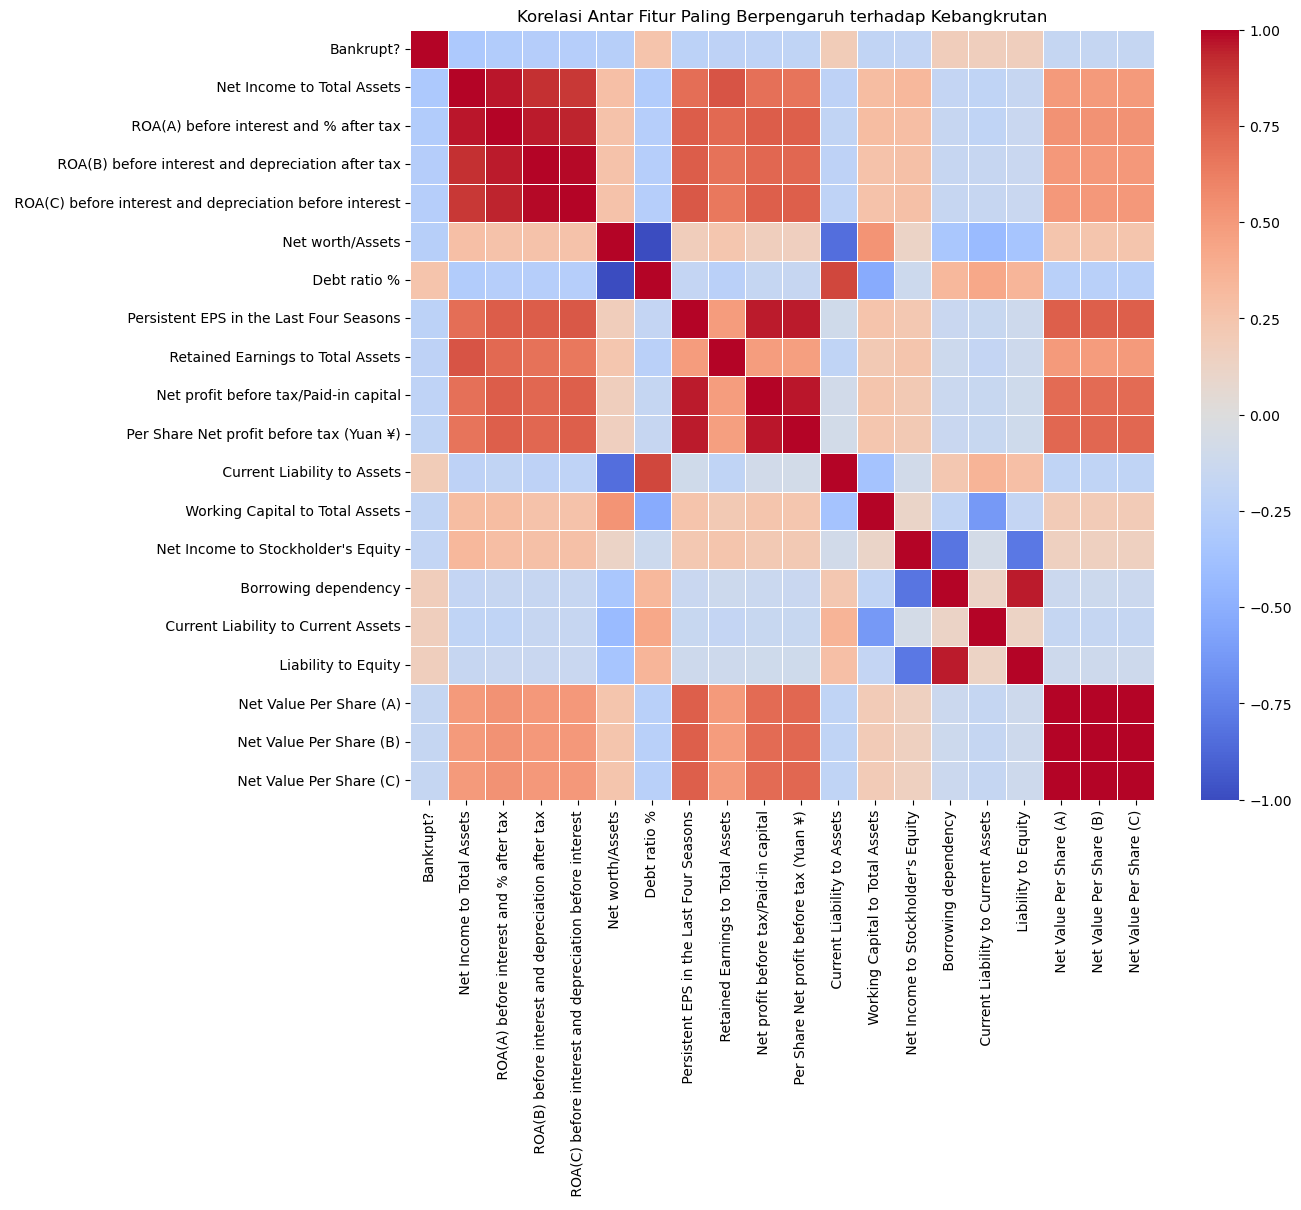

In [18]:
plt.figure(figsize=(12,10))
top_features = df.corr(numeric_only=True)['Bankrupt?'].abs().sort_values(ascending=False).head(20).index
sns.heatmap(df[top_features].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi Antar Fitur Paling Berpengaruh terhadap Kebangkrutan")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.